# Model `BinaryMFPenaltyExSigmoid`

In [31]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : [0.5 0.1 0.5 0.1]
[I] seed         : 1715524093
[I] noise        : [0.4 0.1]
[I] seed         : 2000
[I] Using RandomState.


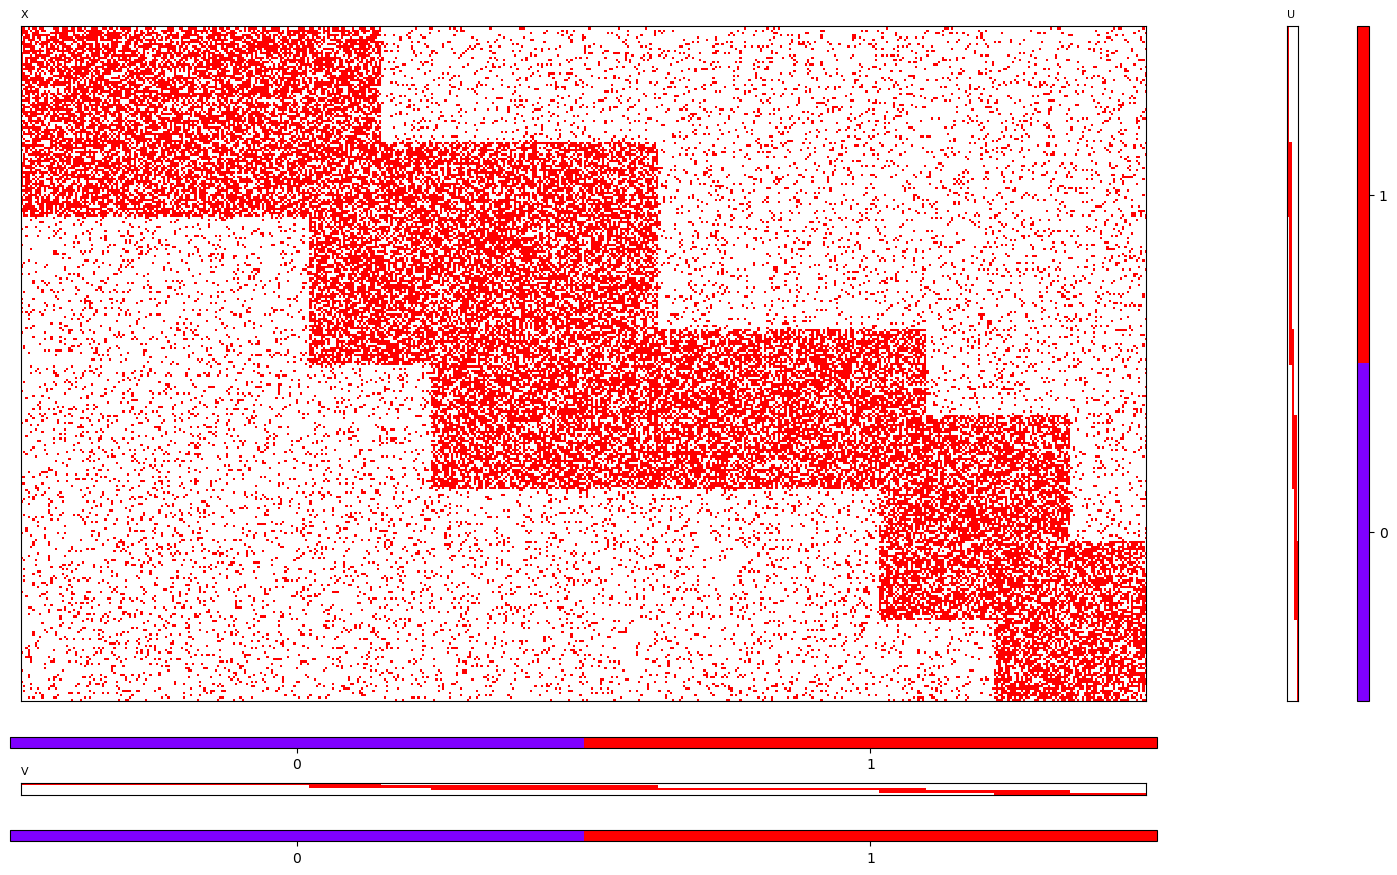

In [32]:
from generators import BlockDiagonalMatrixGenerator

n_row, n_col, k, seed = 300, 500, 5, None

data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.5, 0.1, 0.5, 0.1])
data.generate(seed=seed) # if no seed assigned, use time instead

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [33]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [34]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 30450
[I]   val_size     : 4350
[I]   test_size    : 8700
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 106500
[I]   n_negatives  : 43500
[I]   train_size   : 30450
[I]   val_size     : 4350
[I]   test_size    : 8700
[I]   seed         : 2023


In [35]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

# 0. Prepare init U, V

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] Missing validation data.
[W] Missing testing data.


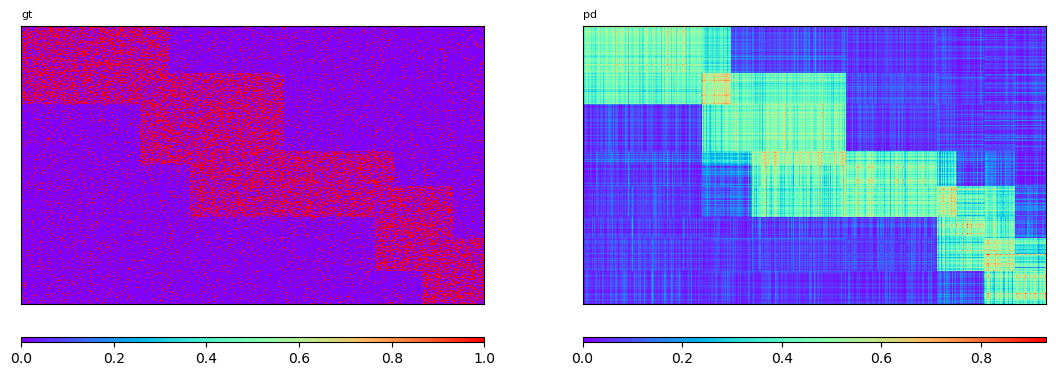

In [36]:
from models import NMFSklearn

k = 5

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

In [37]:
# init U and V
U, V = model_nmf.U, model_nmf.V

# params for BinaryMFPenalty
k = 5
reg = 1
reg_growth = 3
W = 'full'

# params for BinaryMFThresholdExSigmoid
u, v = 0.1, 0.1

# 1. `BinaryMFPenalty` + `BinaryMFThresholdExSigmoid`

Since the regularizer `reg` grows at a rate of `reg_growth`， the total `error` might be constantly increasing. The `reg_error` is decreasing and is considered the convergence indicator.

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 3
[I] tol          : 0.1
[I] min_diff     : 0.0001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : prediction
[I] verbose      : True
[I] display      : True
[I] Normalized U: [0.0, 1.0975095307689229] -> [0.0, 1.0], V: [0.0, 0.9077224206819922] -> [0.0, 1.0]
[I] iter: 1, error: 9.62e+03, rec_error: 9.59e+03, reg: 1.00e+00, reg_error: 3.30e+01
[I] iter: 2, error: 9.68e+03, rec_error: 9.59e+03, reg: 3.00e+00, reg_error: 3.28e+01
[I] iter: 3, error: 9.88e+03, rec_error: 9.59e+03, reg: 9.00e+00, reg_error: 3.21e+01
[I] iter: 4, error: 1.04e+04, rec_error: 9.60e+03, reg: 2.70e+01, reg_error: 3.04e+01
[I] iter: 5, error: 1.19e+04, rec_error: 9.67e+03, reg: 8.10e+01, reg_error: 2.75e+01
[I] iter: 6, error: 1.56

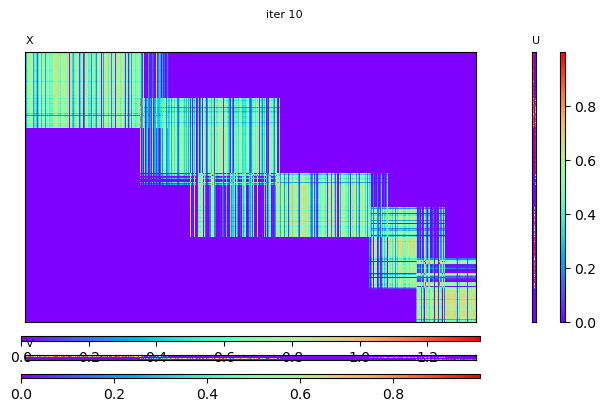

[I] iter: 11, error: 5.39e+05, rec_error: 1.22e+04, reg: 5.90e+04, reg_error: 8.93e+00
[I] iter: 12, error: 1.24e+06, rec_error: 1.27e+04, reg: 1.77e+05, reg_error: 6.95e+00
[I] iter: 13, error: 2.84e+06, rec_error: 1.32e+04, reg: 5.31e+05, reg_error: 5.33e+00
[I] iter: 14, error: 6.46e+06, rec_error: 1.37e+04, reg: 1.59e+06, reg_error: 4.04e+00
[I] iter: 15, error: 1.46e+07, rec_error: 1.41e+04, reg: 4.78e+06, reg_error: 3.05e+00
[I] iter: 16, error: 3.28e+07, rec_error: 1.45e+04, reg: 1.43e+07, reg_error: 2.28e+00
[I] iter: 17, error: 7.35e+07, rec_error: 1.48e+04, reg: 4.30e+07, reg_error: 1.71e+00
[I] iter: 18, error: 1.65e+08, rec_error: 1.50e+04, reg: 1.29e+08, reg_error: 1.28e+00
[I] iter: 19, error: 3.73e+08, rec_error: 1.52e+04, reg: 3.87e+08, reg_error: 9.64e-01
[I] iter: 20, error: 8.47e+08, rec_error: 1.54e+04, reg: 1.16e+09, reg_error: 7.29e-01


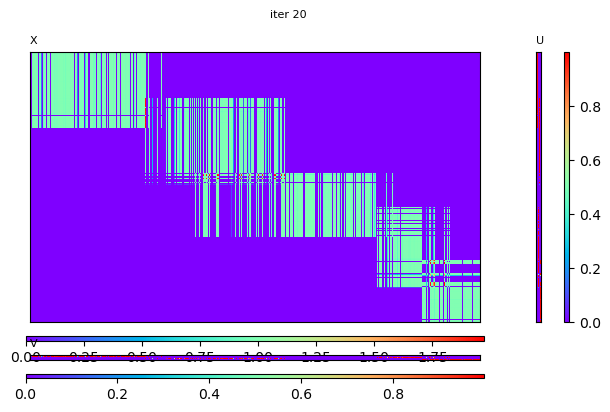

[I] iter: 21, error: 1.92e+09, rec_error: 1.55e+04, reg: 3.49e+09, reg_error: 5.52e-01
[I] iter: 22, error: 4.37e+09, rec_error: 1.56e+04, reg: 1.05e+10, reg_error: 4.17e-01
[I] iter: 23, error: 9.99e+09, rec_error: 1.57e+04, reg: 3.14e+10, reg_error: 3.18e-01
[I] iter: 24, error: 2.30e+10, rec_error: 1.57e+04, reg: 9.41e+10, reg_error: 2.44e-01
[I] iter: 25, error: 5.32e+10, rec_error: 1.58e+04, reg: 2.82e+11, reg_error: 1.88e-01
[I] iter: 26, error: 1.24e+11, rec_error: 1.58e+04, reg: 8.47e+11, reg_error: 1.47e-01
[I] iter: 27, error: 2.88e+11, rec_error: 1.59e+04, reg: 2.54e+12, reg_error: 1.13e-01
[I] iter: 28, error: 6.57e+11, rec_error: 1.59e+04, reg: 7.63e+12, reg_error: 8.62e-02
[W] Stopped in advance: Error lower than tolerance


\
                                                                       
                 time iter         error     rec_error           reg   
0   12/05/24 10:28:16    0  1.009890e+04  10068.615852  1.000000e+00   
1   12/05/24 10:28:17    1  9.618279e+03   9585.252851  1.000000e+00   
2   12/05/24 10:28:18    2  9.683765e+03   9585.303306  3.000000e+00   
3   12/05/24 10:28:18    3  9.876765e+03   9587.837688  9.000000e+00   
4   12/05/24 10:28:19    4  1.042457e+04   9602.744433  2.700000e+01   
5   12/05/24 10:28:20    5  1.189554e+04   9666.700705  8.100000e+01   
6   12/05/24 10:28:21    6  1.563992e+04   9849.262144  2.430000e+02   
7   12/05/24 10:28:22    7  2.495992e+04  10172.947404  7.290000e+02   
8   12/05/24 10:28:23    8  4.786709e+04  10583.543151  2.187000e+03   
9   12/05/24 10:28:24    9  1.030204e+05  11060.291992  6.561000e+03   
10  12/05/24 10:28:25   10  2.336539e+05  11595.835512  1.968300e+04   
11  12/05/24 10:28:26   11  5.394841e+05  12156.105996  5.904900e+04   
12  12/05/24 10:28:27   12  1.244266e+06  12706.927419  1.771470e+05   
13  12/05/24 10:28:28   13  2.843468e+06  13233.031336  5.314410e+05   
14  12/05/24 10:28:29   14  6.455036e+06  13715.025939  1.594323e+06   
15  12/05/24 10:28:30   15  1.458004e+07  14134.408908  4.782969e+06   
16  12/05/24 10:28:30   16  3.278058e+07  14490.936020  1.434891e+07   
17  12/05/24 10:28:31   17  7.348567e+07  14791.143400  4.304672e+07   
18  12/05/24 10:28:32   18  1.652916e+08  15038.661683  1.291402e+08   
19  12/05/24 10:28:33   19  3.733478e+08  15236.851342  3.874205e+08   
20  12/05/24 10:28:34   20  8.472875e+08  15393.674498  1.162261e+09   
21  12/05/24 10:28:35   21  1.923005e+09  15517.009857  3.486784e+09   
22  12/05/24 10:28:36   22  4.365332e+09  15614.338483  1.046035e+10   
23  12/05/24 10:28:37   23  9.990110e+09  15690.622058  3.138106e+10   
24  12/05/24 10:28:38   24  2.296195e+10  15749.205636  9.414318e+10   
25  12/05/24 10:28:39   25  5.323443e+10  15793.792864  2.824295e+11   
26  12/05/24 10:28:39   26  1.244201e+11  15827.080116  8.472886e+11   
27  12/05/24 10:28:40   27  2.880104e+11  15852.026744  2.541866e+12   
28  12/05/24 10:28:41   28  6.573609e+11  15871.569658  7.625597e+12   

                  train                 val                test            
                      0                   0                   0            
    reg_error      RMSE       MAE      RMSE       MAE      RMSE       MAE  
0   30.280987  0.569363  0.524391  0.599794  0.558946  0.592487  0.551550  
1   33.026055  0.652076  0.628972  0.677675  0.656385  0.671779  0.650704  
2   32.820410  0.651641  0.628258  0.677381  0.655871  0.671416  0.650117  
3   32.103077  0.650833  0.626452  0.676849  0.654582  0.670771  0.648705  
4   30.438037  0.650713  0.624007  0.677127  0.653116  0.670843  0.647009  
5   27.516589  0.654300  0.623126  0.681079  0.653744  0.674497  0.647274  
6   23.829870  0.663244  0.624870  0.690522  0.657762  0.683635  0.650846  
7   20.283914  0.673886  0.625801  0.702702  0.662360  0.695673  0.654988  
8   17.047806  0.682342  0.622627  0.714219  0.664355  0.707260  0.656488  
9   14.016177  0.689184  0.616112  0.724652  0.663467  0.717763  0.654969  
10  11.281720  0.695508  0.607789  0.733980  0.660136  0.727009  0.650864  
11   8.930346  0.701001  0.598228  0.741613  0.654566  0.734353  0.644379  
12   6.952188  0.705375  0.587930  0.747456  0.647326  0.739578  0.636088  
13   5.325586  0.708972  0.577649  0.752155  0.639407  0.743491  0.627104  
14   4.040161  0.711778  0.567823  0.755677  0.631270  0.746502  0.618205  
15   3.045369  0.713672  0.558722  0.758028  0.623355  0.748588  0.609786  
16   2.283525  0.715043  0.550791  0.759797  0.616306  0.750163  0.602373  
17   1.706771  0.716272  0.544280  0.761424  0.610497  0.751572  0.596243  
18   1.279823  0.717422  0.539128  0.762934  0.605876  0.752812  0.591326  
19   0.963637  0.718426  0.535134  0.764154  0.602198  0.753859  0.587466  
20   0.728986  0.

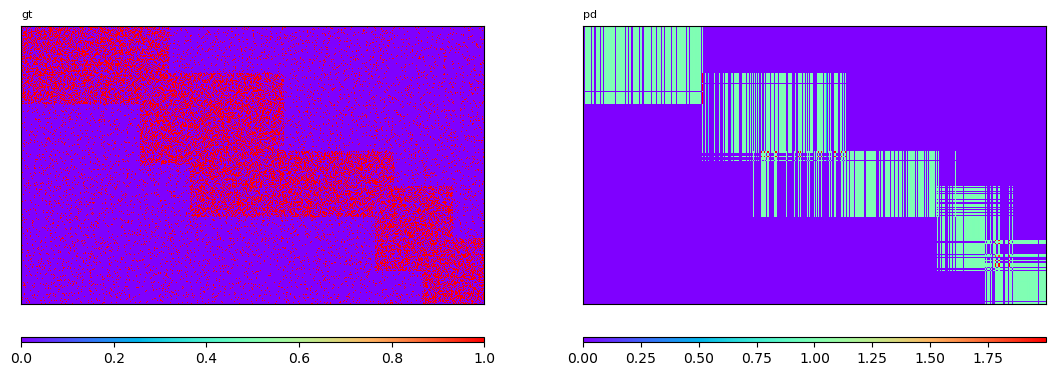

In [38]:
from models import BinaryMFPenalty

max_iter = 100
min_diff = 1e-4
tol = 1e-1

model_bmfp = BinaryMFPenalty(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=max_iter, min_diff=min_diff, tol=tol, seed=2024)
model_bmfp.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=True, display=True)

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1715524122
[I] verbose      : False
[I] display      : False
[I] task         : prediction
[I] Normalized U: [0.0, 0.9999998604027046] -> [0.0, 1.0], V: [0.0, 0.9999900703828896] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [-0.224, -0.379]
[I] iter: 2, start: [0.049, 0.014], direction: [177.883, 8284.607]
[I] iter: 3, start: [0.049, 0.016], direction: [-142.279, -3799.968]
[W] Stopped in advance: Difference lower than threshold


train  \
                                                                    0   
                time iter         u         v             F    Recall   
0  12/05/24 10:28:43    0  0.100000  0.100000  15628.141947  0.481314   
1  12/05/24 10:28:44    1  0.049232  0.014239  15119.018641  0.481314   
2  12/05/24 10:28:45    2  0.049274  0.016214  15100.125513  0.481314   
3  12/05/24 10:28:46    3  0.049241  0.015308  15080.284873  0.481314   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0       1.0  0.481314  0.649847  0.411494       1.0  0.411494  0.583062   
1       1.0  0.481314  0.649847  0.411494       1.0  0.411494  0.583062   
2       1.0  0.481314  0.649847  0.411494       1.0  0.411494  0.583062   
3       1.0  0.481314  0.649847  0.411494       1.0  0.411494  0.583062   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  0.428736       1.0  0.428736  0.600161  
1  0.428736       1.0  0.428736  0.600161  
2  0.428736       1.0  0.428736  0.600161  
3  0.428736       1.0  0.428736  0.600161

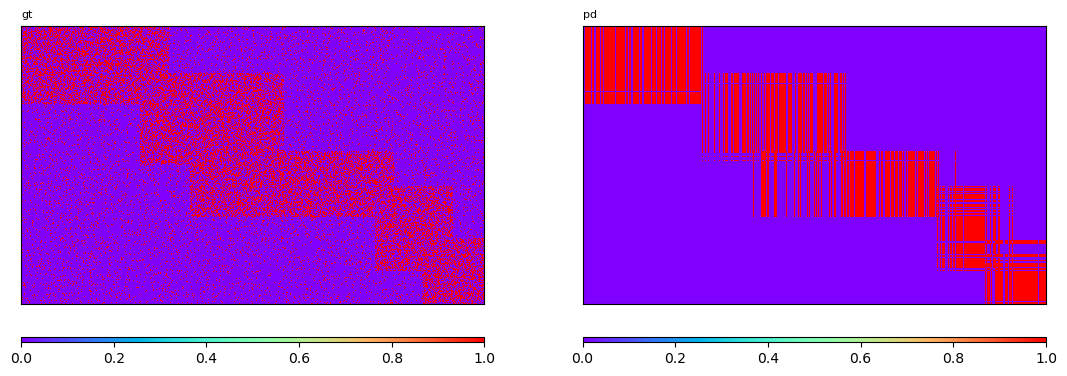

In [39]:
from models import BinaryMFThresholdExSigmoid

model_bmfts_1 = BinaryMFThresholdExSigmoid(k=k, U=model_bmfp.U, V=model_bmfp.V, W=W, u=u, v=v, init_method='custom')
model_bmfts_1.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

In [40]:
from models import BinaryMFThresholdExSigmoidColumnwise

us, vs = u, v

model_bmftsc_1 = BinaryMFThresholdExSigmoidColumnwise(k=k, U=model_bmfp.U, V=model_bmfp.V, W=W, us=us, vs=vs, init_method='custom')
model_bmftsc_1.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] us           : 0.1
[I] vs           : 0.1
[I] link_lamda   : 10
[I] lamda        : 10
[I] lamda_rate   : 1.0
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1715524126
[I] verbose      : False
[I] display      : False
[I] task         : prediction
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
[I] iter: 1


AttributeError: 'BinaryMFThresholdExSigmoidColumnwise' object has no attribute 'line_search'

: 

# 2. `BinaryMFPenaltyExSigmoid` + `BinaryMFThresholdExSigmoid`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] tol          : 0.1
[I] min_diff     : 0.0001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] beta_loss    : frobenius
[I] solver       : mu
[I] link_lamda   : 10
[I] reg_growth   : 3.0
[I] task         : prediction
[I] display      : True
[I] Normalized U: [0.0, 1.0] -> [0.0, 1.0], V: [0.0, 1.0] -> [0.0, 1.0]
[W] Stopped in advance: Error lower than tolerance


\
                                                                      
                 time iter         error    rec_error           reg   
0   02/05/24 04:26:54    0  2.956692e+03  2934.305828  1.000000e+00   
1   02/05/24 04:26:54    1  2.665476e+03  2640.980212  1.000000e+00   
2   02/05/24 04:26:54    2  2.668397e+03  2601.436336  3.000000e+00   
3   02/05/24 04:26:54    3  2.833920e+03  2661.676325  9.000000e+00   
4   02/05/24 04:26:54    4  3.197956e+03  2778.380234  2.700000e+01   
5   02/05/24 04:26:54    5  3.909681e+03  2921.119855  8.100000e+01   
6   02/05/24 04:26:54    6  5.350931e+03  3048.234459  2.430000e+02   
7   02/05/24 04:26:55    7  8.514629e+03  3151.800721  7.290000e+02   
8   02/05/24 04:26:55    8  1.583218e+04  3239.937511  2.187000e+03   
9   02/05/24 04:26:55    9  3.318180e+04  3316.620123  6.561000e+03   
10  02/05/24 04:26:55   10  7.427776e+04  3383.991740  1.968300e+04   
11  02/05/24 04:26:55   11  1.726821e+05  3442.941849  5.904900e+04   
12  02/05/24 04:26:55   12  4.139636e+05  3494.008107  1.771470e+05   
13  02/05/24 04:26:55   13  1.006298e+06  3538.165788  5.314410e+05   
14  02/05/24 04:26:55   14  2.440250e+06  3576.586514  1.594323e+06   
15  02/05/24 04:26:55   15  5.843623e+06  3609.905203  4.782969e+06   
16  02/05/24 04:26:55   16  1.378868e+07  3638.094325  1.434891e+07   
17  02/05/24 04:26:55   17  3.232034e+07  3661.005064  4.304672e+07   
18  02/05/24 04:26:55   18  7.563576e+07  3678.823372  1.291402e+08   
19  02/05/24 04:26:55   19  1.762630e+08  3692.350857  3.874205e+08   
20  02/05/24 04:26:55   20  4.072985e+08  3702.416217  1.162261e+09   
21  02/05/24 04:26:55   21  9.291649e+08  3709.556403  3.486784e+09   
22  02/05/24 04:26:55   22  2.103469e+09  3714.369169  1.046035e+10   
23  02/05/24 04:26:55   23  4.884168e+09  3717.650168  3.138106e+10   
24  02/05/24 04:26:55   24  1.180798e+10  3720.128399  9.414318e+10   
25  02/05/24 04:26:55   25  2.898317e+10  3722.270800  2.824295e+11   
26  02/05/24 04:26:55   26  7.027544e+10  3724.175550  8.472886e+11   

                  train                 val                test            
                      0                   0                   0            
    reg_error      RMSE       MAE      RMSE       MAE      RMSE       MAE  
0   22.385696  0.861635  0.825982  0.902829  0.884374  0.900615  0.880726  
1   24.495874  0.736663  0.661226  0.799022  0.749989  0.801981  0.751477  
2   22.320160  0.753957  0.686643  0.819597  0.778220  0.818712  0.775010  
3   19.138223  0.770707  0.705310  0.833551  0.793028  0.833166  0.790937  
4   15.539848  0.796567  0.732842  0.854162  0.814133  0.854305  0.813291  
5   12.204457  0.821224  0.756986  0.872457  0.831156  0.873766  0.832536  
6    9.476119  0.837196  0.769412  0.883118  0.838294  0.886547  0.842858  
7    7.356417  0.845601  0.772495  0.887980  0.838047  0.893522  0.845776  
8    5.757771  0.850034  0.771108  0.889974  0.834477  0.896972  0.844790  
9    4.551926  0.852443  0.767931  0.890726  0.829915  0.898645  0.842281  
10   3.601777  0.853814  0.764299  0.890976  0.825416  0.899573  0.839430  
11   2.866080  0.854606  0.760725  0.891117  0.821446  0.900133  0.836605  
12   2.317113  0.855058  0.757405  0.891268  0.818092  0.900446  0.833926  
13   1.886869  0.855353  0.754451  0.891425  0.815297  0.900586  0.831416  
14   1.528343  0.855622  0.751887  0.891598  0.812996  0.900609  0.829076  
15   1.221002  0.855904  0.749697  0.891830  0.811134  0.900618  0.826982  
16   0.960703  0.856179  0.747892  0.892132  0.809648  0.900705  0.825247  
17   0.750735  0.856442  0.746472  0.892455  0.808488  0.900891  0.823945  
18   0.585659  0.856688  0.745398  0.892760  0.807618  0.901144  0.823059  
19   0.454956  0.856922  0.744610  0.893043  0.807001  0.901424  0.822491  
20   0.350433  0.857125  0.744029  0.893283  0.806570  0.901674  0.822110  
21   0.266481  0.857263  0.743583  0.893443  0.806254  0.901840  0.821812  
22   0.201089  0.857340  0.743244  0.8

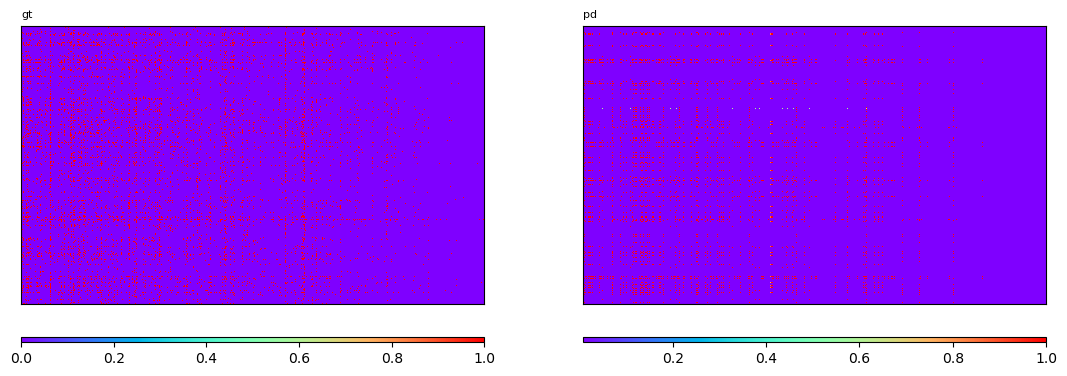

In [ ]:
from models import BinaryMFPenaltyExSigmoid

max_iter = 100
min_diff = 1e-4
tol = 1e-1

k = 5
reg = 1
reg_growth = 3.0
W = 'full'

model_bmfps = BinaryMFPenaltyExSigmoid(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=max_iter, min_diff=min_diff, tol=tol, seed=2024)
model_bmfps.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=True)

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1714638416
[I] verbose      : False
[I] display      : False
[I] u            : 0.1
[I] v            : 0.1
[I] lamda        : 100
[I] link_lamda   : 10
[I] task         : prediction
[I] Normalized U: [0.0, 1.000015762585952] -> [0.0, 1.0], V: [0.0, 1.0000103996024179] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [-0.945, -0.326]
[I] iter: 2, start: [0.017, 0.071], direction: [1.000, 0.000]
[I] iter: 3, start: [0.021, 0.071], direction: [-1.000, -0.003]
[I] iter: 4, start: [0.019, 0.071], direction: [-1.000, -0.008]
[W] Stopped in advance: Difference lower than threshold


train  \
                                                                   0   
                time iter         u         v            F    Recall   
0  02/05/24 04:26:56    0  0.100000  0.100000  3740.694850  0.256277   
1  02/05/24 04:26:56    1  0.016901  0.071377  3640.087086  0.256277   
2  02/05/24 04:26:56    2  0.020807  0.071379  3638.041244  0.256277   
3  02/05/24 04:26:57    3  0.018854  0.071373  3617.908991  0.256277   
4  02/05/24 04:26:57    4  0.018365  0.071369  3617.127475  0.256277   

                                    val                                \
                                      0                                 
  Precision Accuracy        F1   Recall Precision  Accuracy        F1   
0  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   
1  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   
2  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   
3  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   
4  0.845311  0.60469  0.393312  0.19145  0.801556  0.572026  0.309077   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  0.176662  0.811966  0.567875  0.290187  
1  0.176662  0.811966  0.567875  0.290187  
2  0.176662  0.811966  0.567875  0.290187  
3  0.176662  0.811966  0.567875  0.290187  
4  0.176662  0.811966  0.567875  0.290187

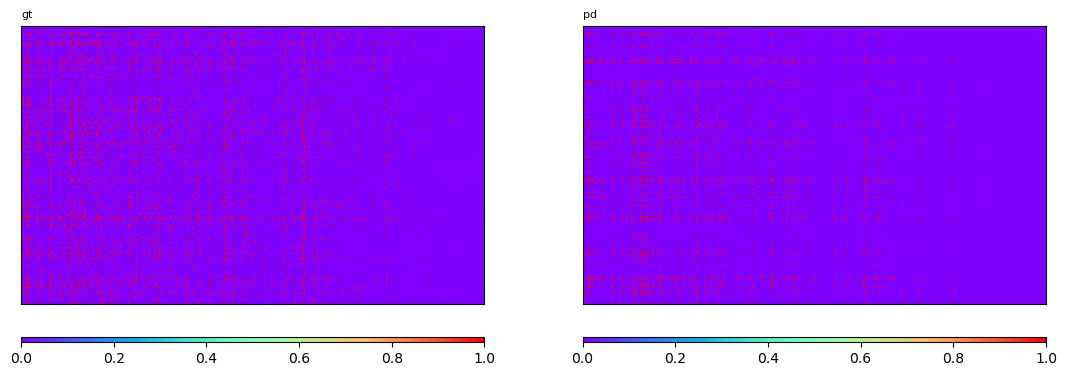

In [ ]:
from models import BinaryMFThresholdExSigmoid

model_bmfts_2 = BinaryMFThresholdExSigmoid(k=k, U=model_bmfps.U, V=model_bmfps.V, W=W, u=u, v=v, init_method='custom')
model_bmfts_2.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)